In [1]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib
from nltk.metrics import edit_distance
import missingno as msno

#import pandas_profiling as pp

# Visualization Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
get_ipython().run_line_magic('matplotlib', 'inline')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import numpy as np

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
#show multiple outputs from one cell

pd.set_option('display.max_columns', None)

#pd.set_option('display.max_rows', None)

#display all columns and rows

In [4]:
df=pd.read_csv(r"C:\Users\holly\Desktop\DAExercises\Class9_DataManipulation\titanic.csv")

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [7]:
df.shape

(891, 15)

In [8]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
357,0,2,female,38.0,0,0,13.0,S,Second,woman,False,NaN,Southampton,no,True


In [10]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
df.nunique()

#Return number of unique elements in the object. It counts the number of unique entries over columns or rows.
#It is very useful in categorical features especially in cases where we do not know the number of categories beforehand.

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [12]:
df.nlargest(5, "age")
#Returns the first n rows ordered by columns in descending order.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


In [13]:
df.nlargest(7, "fare")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False


In [14]:
df.nsmallest(5, "age")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False


In [15]:
dupes=df.duplicated()
dupes.sum()

107

In [16]:
df.corr()
#This function is used to find the pairwise correlation of all columns in the dataframe.

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [17]:
df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [18]:
df["age"].value_counts()

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: age, Length: 88, dtype: int64

# 14 visualizations using Seaborn

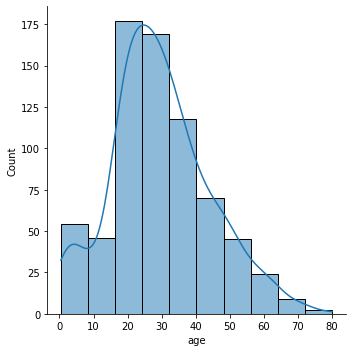

In [19]:
sns.displot(x = df['age'], bins = 10, kde=True)
#Fig. 2: Distribution Plot for ‘Age’ of Passengers.

Here x-axis is the age and the y-axis displays frequency. For example, for bins =
10, there are around 50 people having age 0 to 10

### Joint Plot

It is the combination of the distplot of two variables.

It is an example of bivariate analysis.

We additionally obtain a scatter plot between the variable to reflecting their
linear relationship. We can customize the scatter plot into a hexagonal plot,
where, more the color intensity, the more will be the number of observations.

import seaborn as sns


In [20]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

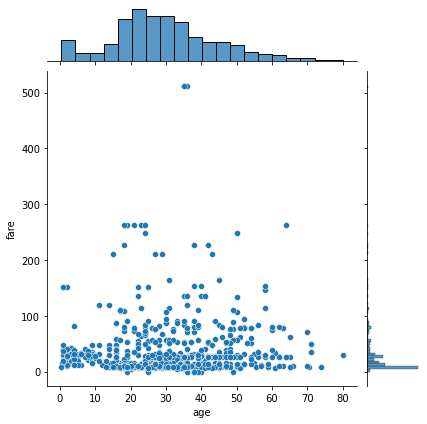

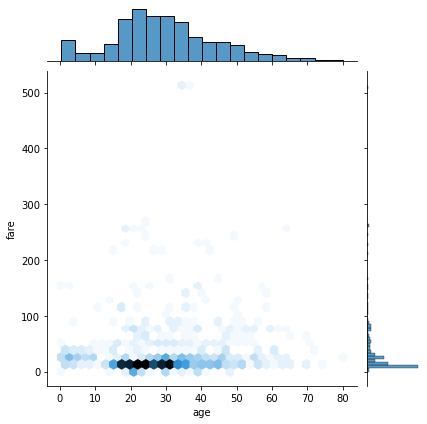

In [21]:
# For Plot 1
sns.jointplot(x = df['age'], y = df['fare'], kind = 'scatter')

# For Plot 2
sns.jointplot(x = df['age'], y = df['fare'], kind = 'hex')

We can see that there no appropriate linear relation between age and fare.

kind = ‘hex’ provides the hexagonal plot and kind = ‘reg’ provides a regression
line on the graph.

### Pair plot

It takes all the numerical attributes of the data and plot pairwise scatter plot for
two different variables and histograms from the same variables.

<__array_function__ internals>:5: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<__array_function__ internals>:5: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<__array_function__ internals>:5: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<__array_function__ internals>:5: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



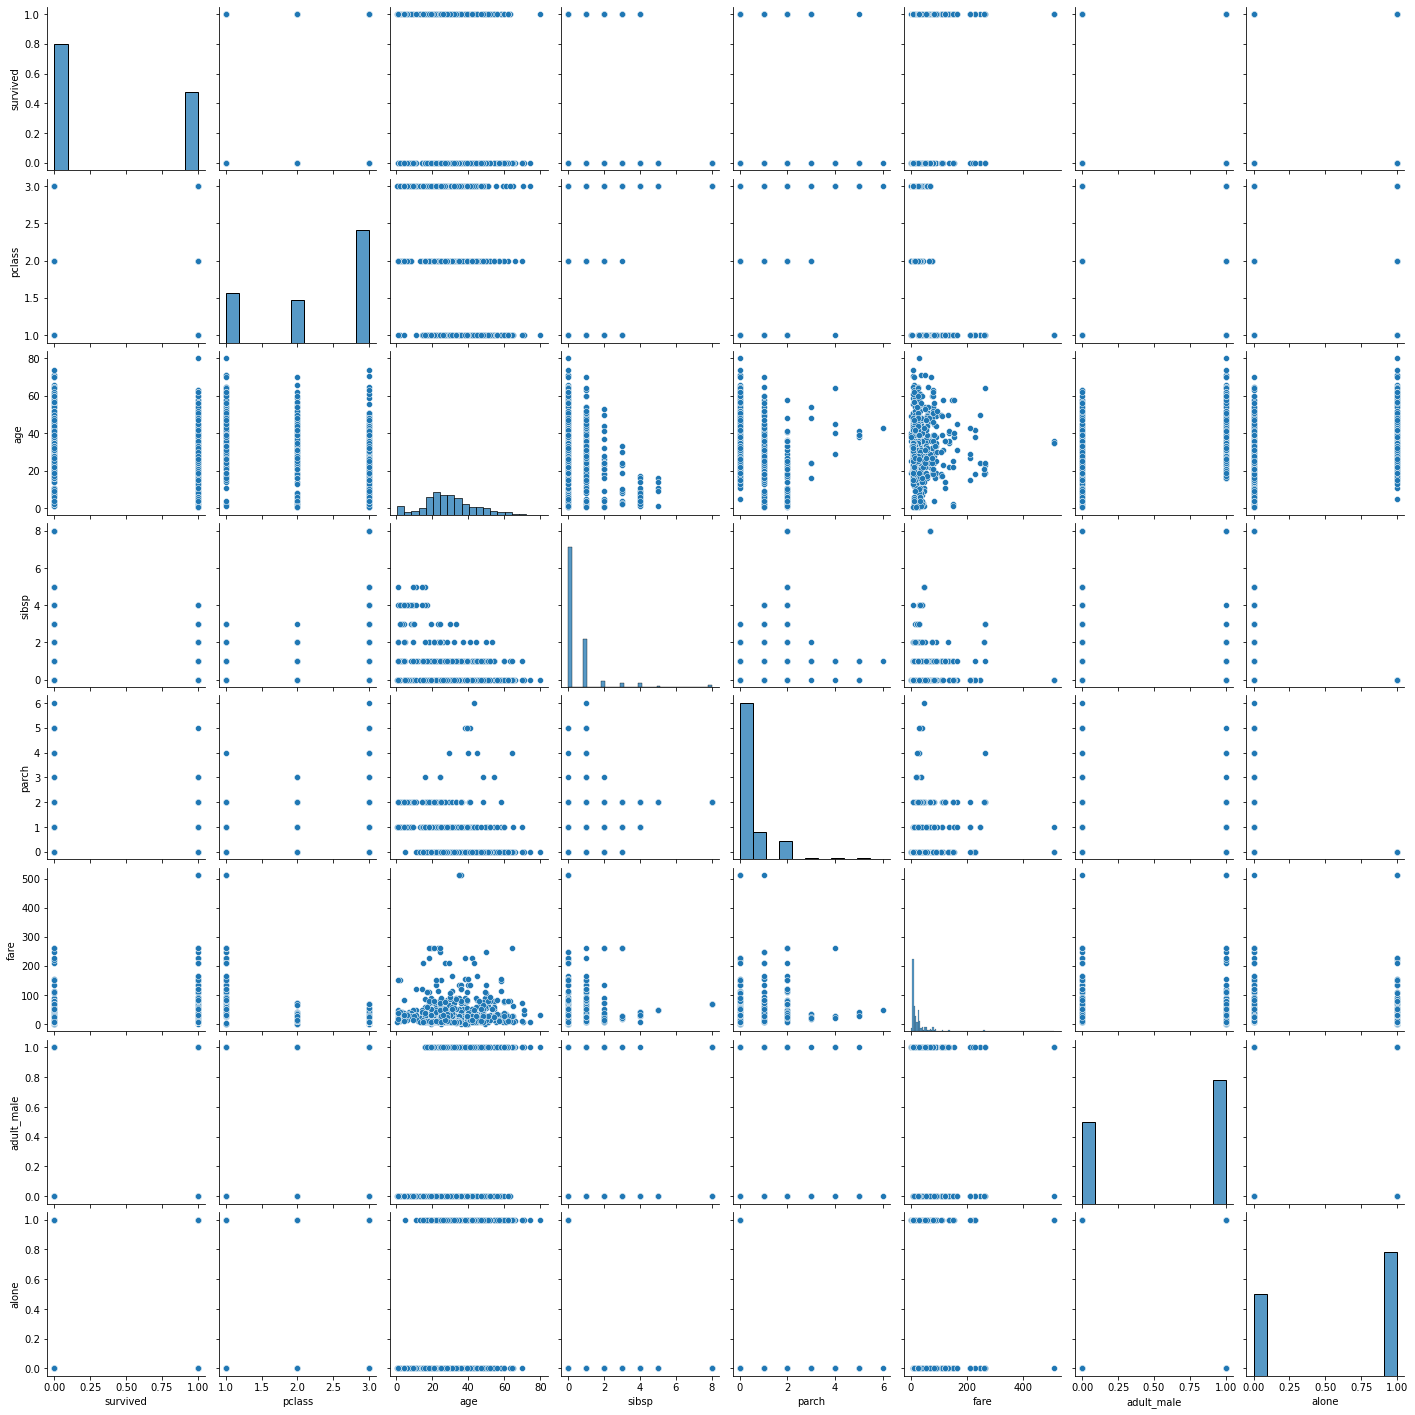

In [22]:
sns.pairplot(df)

plt.show()

### Rug Plot

It draws a dash mark instead of a uniform distribution as in distplot.

It is an example of a univariate analysis.

<AxesSubplot:xlabel='age'>

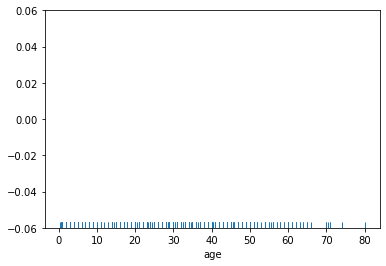

In [23]:
sns.rugplot(x = df['age'])

## Categorical Plots

These plots help us understand the categorical variables. We can use them for
both univariate and bivariate analysis.

### Bar Plot

It is an example of bivariate analysis.

On the x-axis, we have a categorical variable and on the y-axis, we have a
continuous variable.

<AxesSubplot:xlabel='sex', ylabel='fare'>

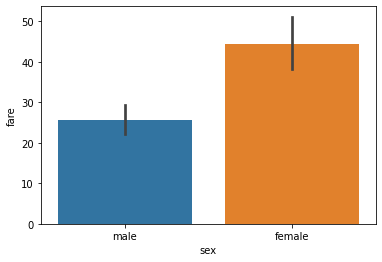

In [24]:
sns.barplot(x = df['sex'], y = df['fare'])

We can infer that the average fare is higher for females than males.

### Count Plot

It counts the number of occurrences of categorical variables.

It is an example of a univariate analysis.

C:\Users\holly\anaconda3\envs\Pandas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='pclass', ylabel='count'>

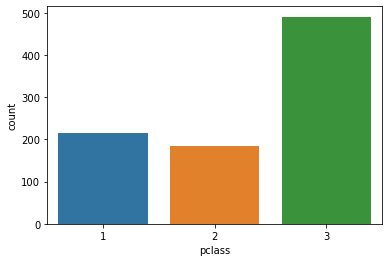

In [25]:
sns.countplot(df['pclass'])

### Box Plot


It is a 5 point summary plot. It gives the information about the maximum, minimum, mean, first quartile, and third quartile of a continuous variable. Also, it equips us with knowledge of outliers.

We can plot this for a single continuous variable or can analyze different categorical variables based on a continuous variable.

C:\Users\holly\anaconda3\envs\Pandas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='age'>

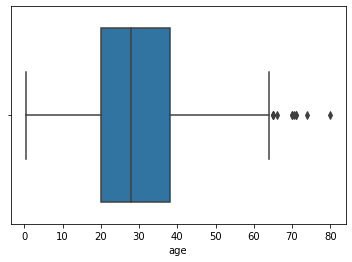

In [26]:
#For plot 1
sns.boxplot(df['age'])


<AxesSubplot:xlabel='sex', ylabel='age'>

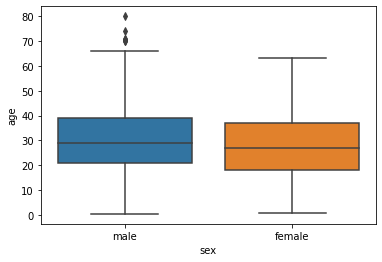

In [27]:
#For plot 2
sns.boxplot(y = df['age'], x = df['sex'])

a) Box plot of ‘Age’, b) Box plot of different categories in ‘sex’ for ‘Age’

### Violin Plot

It is similar to the Box plot, but it gives supplementary information about the distribution too.
import seaborn as sns



<AxesSubplot:xlabel='sex', ylabel='age'>

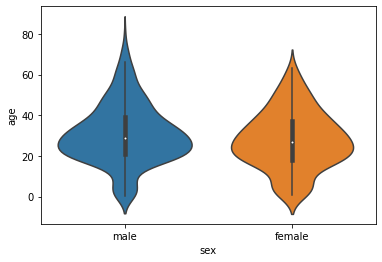

In [28]:
sns.violinplot(y = df['age'], x = df['sex'])

## Advanced Plots

As the name suggests, they are advanced because they ought to fuse the distribution and categorical encodings.

### Strip Plot

It’s a plot between a continuous variable and a categorical variable.

It plots as a scatter plot but supplementarily uses categorical encodings of the categorical variable.

<AxesSubplot:xlabel='pclass', ylabel='age'>

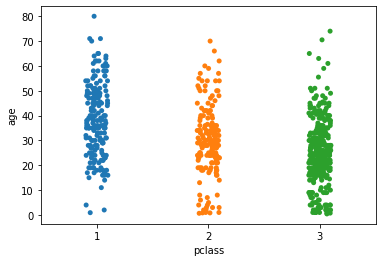

In [29]:
sns.stripplot(y = df['age'], x = df['pclass'])

We can observe that in class 1 and class 2, children around 10 years are not present and the people having age above 60 are mostly accommodated in class 1.

Usually, these types of observations are used to impute missing values.

### Swarm Plot

It is the combination of a strip plot and a violin plot.

Along with the number of data points, it also provides their respective distribution.

import seaborn as sns


C:\Users\holly\anaconda3\envs\Pandas\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



<AxesSubplot:xlabel='pclass', ylabel='age'>

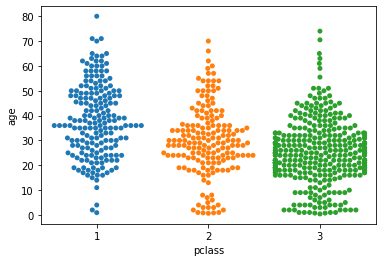

In [30]:
sns.swarmplot(y = df['age'], x = df['pclass'])

## Matrix Plots

These are the special types of plots that use two-dimensional matrix data for visualization. It is difficult to analyze and generate patterns from matrix data because of its large dimensions. So, this makes the process easier by providing color coding to matrix data.


### Heat Map

In the given raw dataset ‘df’, we have seven numeric variables. So, let us generate a correlation matrix between these seven variables.

In [31]:
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


It seems very difficult to read every value even though there are only 49 values. The intricacy intensifies as we traverse towards thousands of features.

So, let us try to implement some color coding and see how easy the interpretation becomes.


<AxesSubplot:>

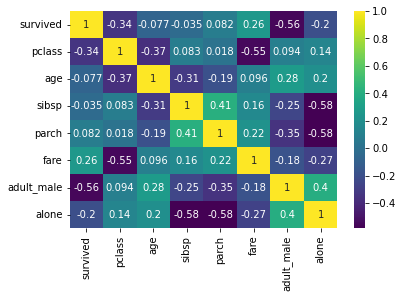

In [32]:
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

The same matrix is now articulating more information.

Another very obvious example is to use heatmaps to understand the missing value patterns. In the following heat map, the yellow dash represents a missing value, hence it makes our tasks more effortless to identify the missing values.

<AxesSubplot:>

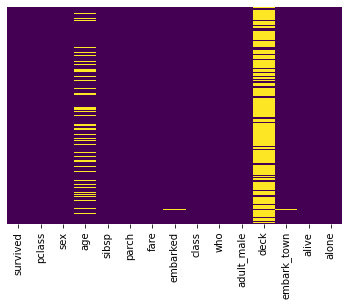

In [33]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Cluster Map

If we have a matrix data and want to group some features according to their similarity, cluster maps can assist us. Once, have a look at the heat map (Fig. 13) and then look at the cluster map (Fig. 15).


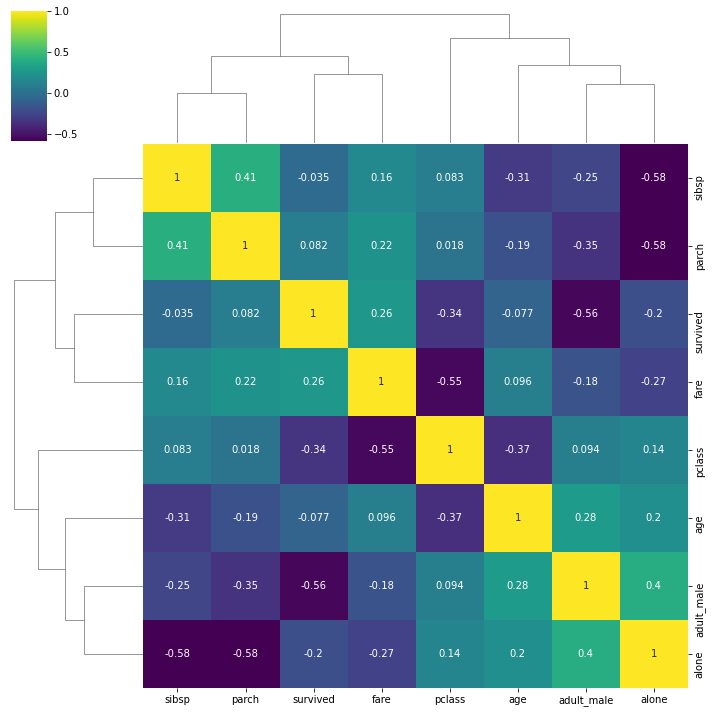

In [34]:
sns.clustermap(df.corr(), annot = True, cmap = 'viridis')

The x-label and y-label are the same but they harmonized differently. That is because they are grouped according to their similarity.

The flow-chart like structure at the top and left describe their degree of similarity.

Cluster maps use Hierarchical clustering to form different clusters.


## Grids

Grid plots provide us more control over visualizations and plots various assorted graphs with a single line of code.


### Facet Grid

Suppose we want to plot the age distribution of males and females in all the three classes of tickets. Hence, we would be having in a total of 6 graphs.


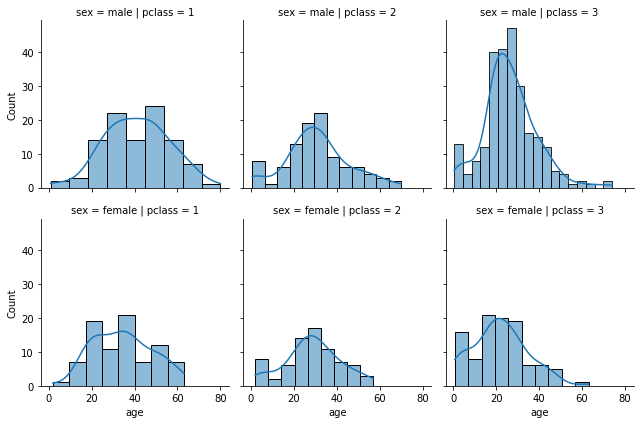

In [35]:
sns.FacetGrid(df, col = 'pclass', row = 'sex').map(sns.histplot, 'age', kde=True)

The Facet grids provide very clear graphs as per requirements.

sns.FacetGrid( col = ‘col’, row = ‘row’, data = data) provides an empty grid of all unique categories in the col and row. 

Later, we can use different plots and common variables for peculiar variations.


### Regression Plot

This is a more advanced statistical plot that provides a scatter plot along with a linear fitting on the data.



In [36]:
df1 = pd.read_csv(r"C:\Users\holly\Desktop\Local to git\Local_to_Git\Titanic_with_Visualizations\titanic with ID.csv")

#df1.set_index("PassengerId", inplace = True)

#To set a column as index

df1.columns

df1.head()




Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


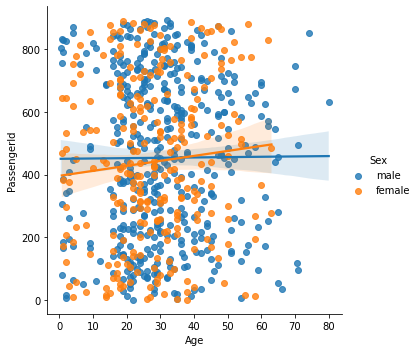

In [37]:
sns.lmplot(data=df1, x='Age', y='PassengerId', hue='Sex')

Fig. 17: Regression Plot between Age and Passenger ID for males and females. | Disclaimer: There is so the significance of regressing age and passenger id. It is just the purpose of understanding visualization.

Fig. 17 displays the linear regression fitting between Passenger ID and Age for both males and females.

### Bar chart using Matplotlib- Fare based on grouping (Man, Woman, Child)

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

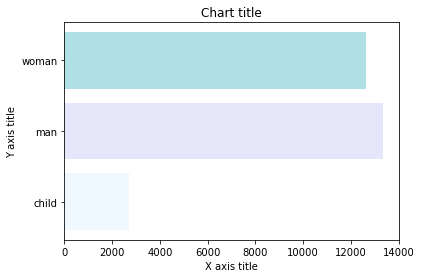

In [38]:
who_fare=df.groupby('who')['fare'].sum().to_frame().reset_index()

#Creating the bar chart 
plt.barh(who_fare['who'],who_fare['fare'],color = ['#F0F8FF','#E6E6FA','#B0E0E6']) 

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 

#Show the plot
plt.show()

### Bar chart using Seaborn

<AxesSubplot:xlabel='fare', ylabel='who'>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

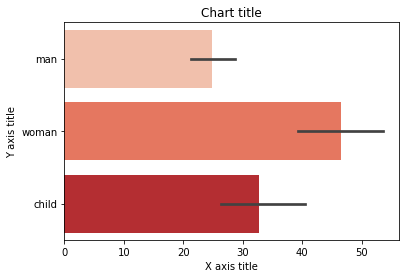

In [39]:

#Creating bar plot
sns.barplot(x = 'fare',y = 'who',data = df,palette = "Reds")

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 
# Show the plot
plt.show()

### Column chart

### Column charts are mostly used when we need to compare a single category of data between individual sub-items, for example, when comparing revenue between regions


<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

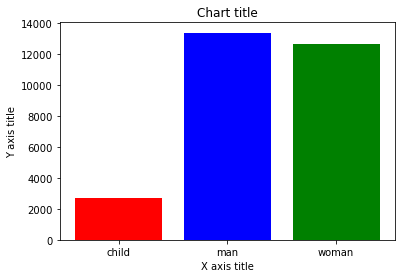

In [40]:
# Column chart using Matplotlib

#Creating the dataset
# df = sns.load_dataset('titanic') 
# df=df.groupby('who')['fare'].sum().to_frame().reset_index()

#done with variable who_fare

#Creating the column plot 
plt.bar(who_fare['who'],who_fare['fare'],color = ['red','blue','green']) 

#['#F0F8FF','#E6E6FA','#B0E0E6'] shades of blue

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 

#Show the plot
plt.show()

### Column chart using Seaborn

### A column chart is used to show a comparison among different items, or it can show a comparison of items over time.

<AxesSubplot:xlabel='who', ylabel='fare'>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

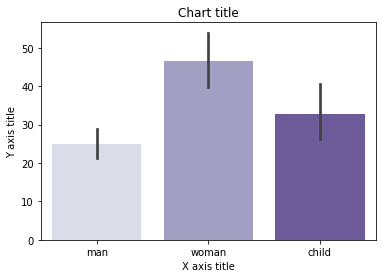

In [41]:
#Reading the dataset
#titanic_dataset = sns.load_dataset('titanic')

#Creating column chart
sns.barplot(x = 'who',y = 'fare',data = df,palette = "Purples")

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title')

# Show the plot
plt.show()

**Grouped bar chart**

**A grouped bar chart is used when we want to compare the values in certain groups and sub-groups**

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

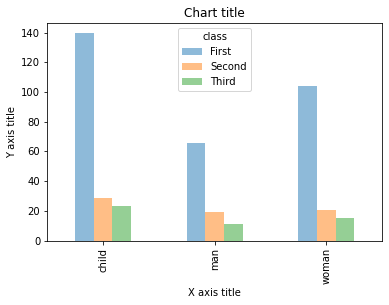

In [42]:
#Grouped bar chart using Matplotlib
#Creating the dataset
#df = sns.load_dataset('titanic')

df_pivot = pd.pivot_table(df, values="fare",index="who",columns="class", aggfunc=np.mean)

#Creating a grouped bar chart
ax = df_pivot.plot(kind="bar",alpha=0.5)

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 

# Show the plot
plt.show()

### Grouped bar chart using Seaborn

<AxesSubplot:xlabel='who', ylabel='fare'>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

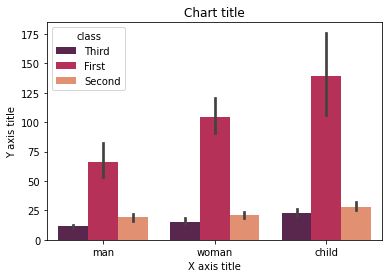

In [43]:
#Reading the dataset
#titanic_dataset = sns.load_dataset('titanic')

#Creating the bar plot grouped across classes
sns.barplot(x = 'who',y = 'fare',hue = 'class',data = df, palette = "rocket")

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 
# Show the plot
plt.show()

### Stacked bar chart

### A stacked bar chart is used when we want to compare the total sizes across the available groups and the composition of the different sub-groups. i.e Stacked charts handle part-to-whole relationships. This is when you are comparing data to itself rather than seeing a total – often in the form of percentages


<AxesSubplot:xlabel='A'>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

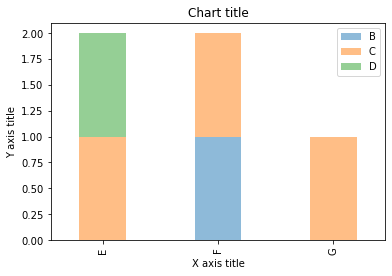

In [44]:
#Stacked bar chart using Matplotlib

# Stacked bar chart 
#Creating the dataset
df = pd.DataFrame(columns=["A","B", "C","D"], 
                  data=[["E",0,1,1],
                        ["F",1,1,0],
                        ["G",0,1,0]])

df.plot.bar(x='A', y=["B", "C","D"],  stacked=True,  width = 0.4,alpha=0.5) 

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title')  

#Show the plot
plt.show()


<AxesSubplot:>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

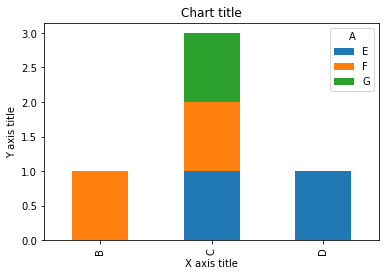

In [45]:
#stacked bar chart using Seaborn

dataframe = pd.DataFrame(columns=["A","B", "C","D"], 
                  data=[["E",0,1,1],
                        ["F",1,1,0],
                        ["G",0,1,0]])
dataframe.set_index('A').T.plot(kind='bar', stacked=True)

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 

# Show the plot
plt.show()

### Line chart

### A line chart is used for the representation of continuous data points. This visual can be effectively utilized when we want to understand the trend across time.

### Line chart using Matplotlib

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

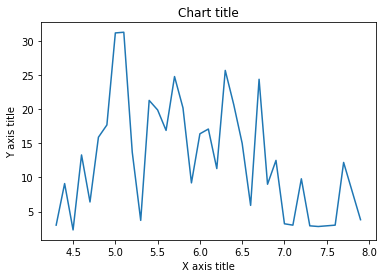

In [46]:
#Creating the dataset
df = sns.load_dataset("iris") 
df=df.groupby('sepal_length')['sepal_width'].sum().to_frame().reset_index()

#Creating the line chart
plt.plot(df['sepal_length'], df['sepal_width'])

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 

#Show the plot
plt.show()

### Pie chart

### Pie charts can be used to identify proportions of the different components in a given whole.

### Pie chart using Matplotlib

([<matplotlib.patches.Wedge at 0x2167666bc40>,
 [Text(0.8899186877588753, 0.6465637858537406, 'AUDI'),
  Text(-0.17207795223283848, 1.086457168210212, 'BMW'),
  Text(-0.9801072140121811, 0.4993894763020951, 'NISSAN'),
  Text(-0.9953097129848341, -0.46835731577295503, 'TESLA'),
  Text(-0.20611935297230657, -1.0805159935559852, 'HYUNDAI'),
  Text(0.8899187482945414, -0.6465637025335375, 'HONDA')])

Text(0.5, 1.0, 'Chart title')

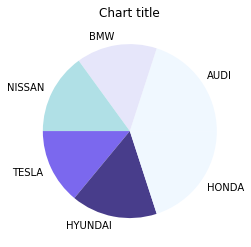

In [47]:
#Creating the dataset
cars = ['AUDI', 'BMW', 'NISSAN', 
        'TESLA', 'HYUNDAI', 'HONDA'] 
data = [20, 15, 15, 14, 16, 20] 
#Creating the pie chart
plt.pie(data, labels = cars,colors = ['#F0F8FF','#E6E6FA','#B0E0E6','#7B68EE','#483D8B'])
#Adding the aesthetics
plt.title('Chart title')
#Show the plot
plt.show()

([<matplotlib.patches.Wedge at 0x216766cf100>,
 [Text(0.8899186877588753, 0.6465637858537406, 'AUDI'),
  Text(-0.17207795223283848, 1.086457168210212, 'BMW'),
  Text(-0.9801072140121811, 0.4993894763020951, 'NISSAN'),
  Text(-0.9953097129848341, -0.46835731577295503, 'TESLA'),
  Text(-0.20611935297230657, -1.0805159935559852, 'HYUNDAI'),
  Text(0.8899187482945414, -0.6465637025335375, 'HONDA')])

Text(0.5, 1.0, 'Chart title')

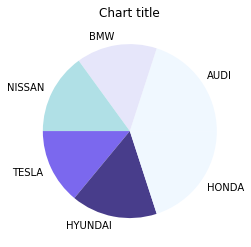

In [48]:

#Creating the dataset
cars = ['AUDI', 'BMW', 'NISSAN', 
        'TESLA', 'HYUNDAI', 'HONDA'] 
data = [20, 15, 15, 14, 16, 20] 

#Creating the pie chart
plt.pie(data, labels = cars,colors = ['#F0F8FF','#E6E6FA','#B0E0E6','#7B68EE','#483D8B'])

#)

#Adding the aesthetics
plt.title('Chart title')

#Show the plot
plt.show()

### Area chart

### An area chart is basically a line chart, but the space between the x-axis and the line is filled with a color or pattern. It is useful for showing part-to-whole relations, such as showing individual sales reps' contribution to total sales for a year. It helps you analyze both overall and individual trend information.

### Area charts are used to track changes over time for one or more groups. Area graphs are preferred over line charts when we want to capture the changes over time for more than 1 group.

### Area chart using Matplotlib

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

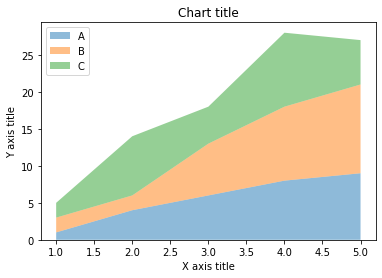

In [49]:
#Reading the dataset
x=range(1,6)
y=[ [1,4,6,8,9], [2,2,7,10,12], [2,8,5,10,6] ]

#Creating the area chart 
ax = plt.gca()
ax.stackplot(x, y, labels=['A','B','C'],alpha=0.5)

#Adding the aesthetics
plt.legend(loc='upper left')
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title')

#Show the plot
plt.show()


**Area chart using Seaborn**

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

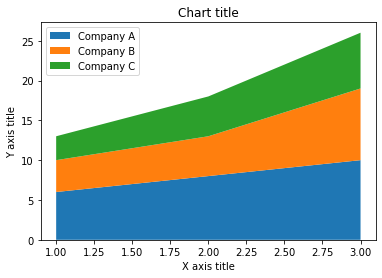

In [50]:
# Data
years_of_experience =[1,2,3]
salary=[ [6,8,10], [4,5,9], [3,5,7] ]

# Plot
plt.stackplot(years_of_experience,salary, labels=['Company A','Company B','Company C'])
plt.legend(loc='upper left')

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 

# Show the plot
plt.show()


### Column histogram
### Column histograms are used to observe the distribution for a single variable with few data points.

### Column chart using Matplotlib

(array([ 3., 22., 52., 79., 44., 15., 42., 42., 28., 15.]),
 array([172. , 177.9, 183.8, 189.7, 195.6, 201.5, 207.4, 213.3, 219.2,
        225.1, 231. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

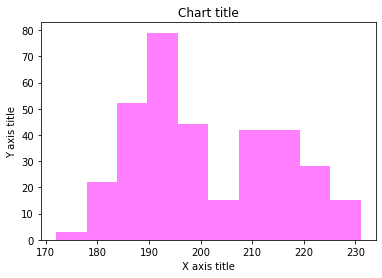

In [51]:
#Creating the dataset
penguins = sns.load_dataset("penguins")

#Creating the column histogram
ax = plt.gca()
ax.hist(penguins['flipper_length_mm'], color='magenta',alpha=0.5, bins=10)

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 

#Show the plot
plt.show()


### Column chart using Seaborn

Text(0.5, 1.0, 'Chart title')

Text(0.5, 6.79999999999999, 'X axis title')

Text(10.049999999999997, 0.5, 'Y axis title')

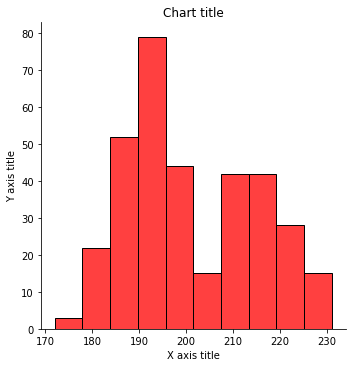

In [52]:
#Reading the dataset
penguins_dataframe = sns.load_dataset("penguins")

#Plotting bar histogram
sns.displot(penguins_dataframe['flipper_length_mm'], kde=False, color='red', bins=10)

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 

# Show the plot
plt.show()

### Line histogram

### Line histograms are used to observe the distribution for a single variable with many data points.

### Line histogram chart using Matplotlib

In [53]:
#Creating the dataset
# df_1 = np.random.normal(0, 1, (1000, ))
# density = stats.gaussian_kde(df_1)

# #Creating the line histogram
# n, x, _ = plt.hist(df_1, bins=np.linspace(-3, 3, 50), histtype=u'step', density=True)  
# plt.plot(x, density(x))

# #Adding the aesthetics
# plt.title('Chart title')
# plt.xlabel('X axis title')
# plt.ylabel('Y axis title') 

# #Show the plot
# plt.show()


#cant find the data set csv

### Line histogram chart using Seaborn

C:\Users\holly\anaconda3\envs\Pandas\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

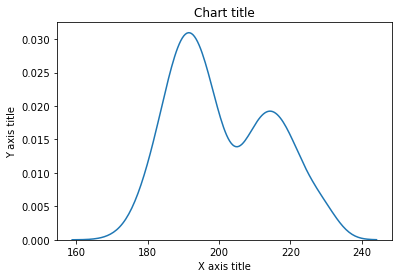

In [54]:
#Reading the dataset
penguins_dataframe = sns.load_dataset("penguins")

#Plotting line histogram
sns.distplot(penguins_dataframe['flipper_length_mm'], hist = False, kde = True, label='Africa')

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 

# Show the plot
plt.show()

### Scatter plot

### Scatter plots can be leveraged to identify relationships between two variables. It can be effectively used in circumstances where the dependent variable can have multiple values for the independent variable.

### Scatter plot using Matplotlib

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

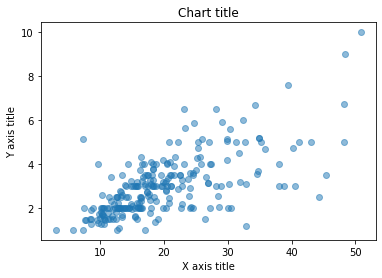

In [55]:
#Creating the dataset
df = sns.load_dataset("tips")

#Creating the scatter plot
plt.scatter(df['total_bill'],df['tip'],alpha=0.5 )

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title')

#Show the plot
plt.show()


**Scatter plot using Seaborn**

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

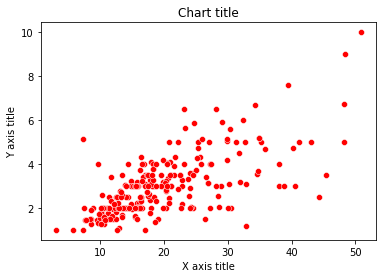

In [56]:
#Reading the dataset
bill_dataframe = sns.load_dataset("tips")

#Creating scatter plot
sns.scatterplot(data=bill_dataframe, x="total_bill", y="tip", color='red')

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 
# Show the plot
plt.show()

### Bubble chart

### Scatter plots can be leveraged to depict and show relationships among three variables.

### Bubble chart using Matplotlib

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

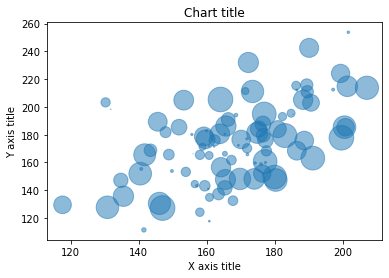

In [57]:
#Creating the dataset
np.random.seed(42)
N = 100
x = np.random.normal(170, 20, N)
y = x + np.random.normal(5, 25, N)
colors = np.random.rand(N)
area = (25 * np.random.rand(N))**2
df = pd.DataFrame({
    'X': x,
    'Y': y,
    'Colors': colors,
    "bubble_size":area})

#Creating the bubble chart
plt.scatter('X', 'Y', s='bubble_size',alpha=0.5, data=df)

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 

#Show the plot
plt.show()

### Bubble chart using Seaborn

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

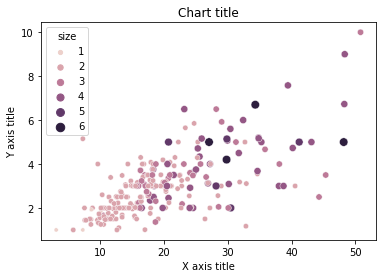

In [58]:
#Reading the dataset
bill_dataframe = sns.load_dataset("tips")

#Creating bubble plot
sns.scatterplot(data=bill_dataframe, x="total_bill", y="tip", hue="size", size="size")

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title')

# Show the plot
plt.show()

### Box plot

### A box plot is used to show the shape of the distribution, its central value, and its variability.

### Box plot using Matplotlib

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

([<matplotlib.axis.XTick at 0x21677ae1e20>,
 [Text(0, 0, 'A'), Text(2, 0, 'B'), Text(4, 0, 'C')])

(-2.0, 6.0)

(0.0, 8.0)

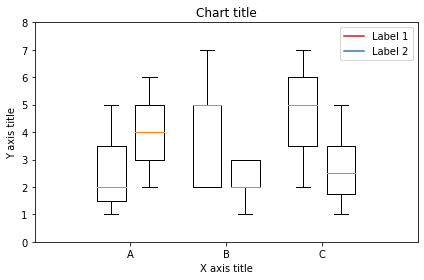

In [59]:
from past.builtins import xrange

#Creating the dataset
df_1 = [[1,2,5], [5,7,2,2,5], [7,2,5]]
df_2 = [[6,4,2], [1,2,5,3,2], [2,3,5,1]]

#Creating the box plot
ticks = ['A', 'B', 'C']
plt.figure()
bpl = plt.boxplot(df_1, positions=np.array(xrange(len(df_1)))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot(df_2, positions=np.array(xrange(len(df_2)))*2.0+0.4, sym='', widths=0.6)
plt.plot([], c='#D7191C', label='Label 1')
plt.plot([], c='#2C7BB6', label='Label 2')

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 
plt.legend()
plt.xticks(xrange(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 8)
plt.tight_layout()

#Show the plot
plt.show()

### Box plot using Seaborn

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

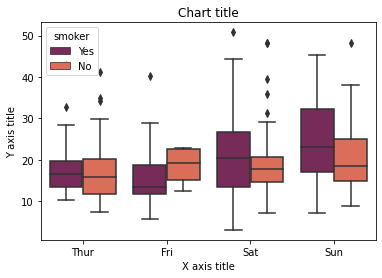

In [60]:
#Reading the dataset
bill_dataframe = sns.load_dataset("tips")

#Creating boxplots
ax = sns.boxplot(x="day", y="total_bill", hue="smoker", data=bill_dataframe, palette="rocket")

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title')

# Show the plot
plt.show()

### Waterfall chart

### A waterfall chart can be used to explain the gradual transition in value of a variable that is subjected to increments or decrements

### A waterfall chart should be used to show how an initial value is affected by intermediate values -- either positive or negative -- and resulted in a final value. This should be used to reveal the composition of a number. An example of this would be to showcase how overall company revenue is influenced by different departments and leads to a specific profit number


Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

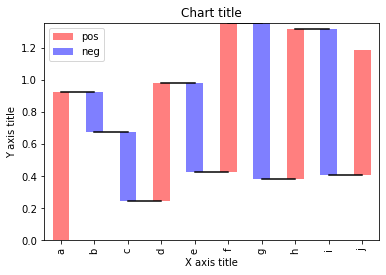

In [61]:
#Reading the dataset
test = pd.Series(-1 + 2 * np.random.rand(10), index=list('abcdefghij'))

#Function for making a waterfall chart
def waterfall(series):
    df = pd.DataFrame({'pos':np.maximum(series,0),'neg':np.minimum(series,0)})
    blank = series.cumsum().shift(1).fillna(0)
    df.plot(kind='bar', stacked=True, bottom=blank, color=['r','b'], alpha=0.5)
    step = blank.reset_index(drop=True).repeat(3).shift(-1)
    step[1::3] = np.nan
    plt.plot(step.index, step.values,'k')
    
#Creating the waterfall chart
waterfall(test)

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title')

#Show the plot
plt.show()


### Venn diagram

### Venn diagrams are used to see the relationships between two or three sets of items. It highlights the similarities and differences


In [62]:
#pip install matplotlib-venn

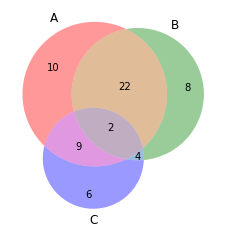

In [63]:
from matplotlib_venn import venn3

#Making venn  diagram
venn3(subsets = (10, 8, 22, 6,9,4,2))
plt.show()

### Tree map

### Tree Maps are primarily used to display data that is grouped and nested in a hierarchical structure and observe the contribution of each component


To create a treemap, we have to install and import the squarify library (pip install squarify). This type of plots is similar to a pie chart in terms that it also displays proportions of individual components of the whole. Instead of wedges, it uses a set of rectangles, the areas of which are proportional to the values of the corresponding categories. This makes a difference and is actually an advantage: mental comparison of areas is certainly much easier than that of angles. Also, unlike a pie chart, it still works well in the case when we have a lot of categories to compare. Below are the weak sides and limitations that a treemap has in common with a pie chart:


It doesn’t work well when the proportions of the categories are similar.
It doesn’t have axes, so we have to rely on a visual comparison of the rectangles or to add the values on each of them.
It implies using a lot of colors which can make the resulting graph look a bit overwhelming.
The components of a treemap are supposed to constitute the whole.


In [64]:
#pip install squarify

<AxesSubplot:>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

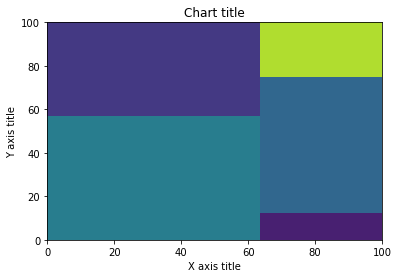

In [65]:
import squarify 
sizes = [40, 30, 5, 25, 10]
squarify.plot(sizes)

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 
# Show the plot
plt.show()

<AxesSubplot:>

Text(0.5, 1.0, 'Continents by area, mln km2')

(0.0, 100.0, 0.0, 100.0)

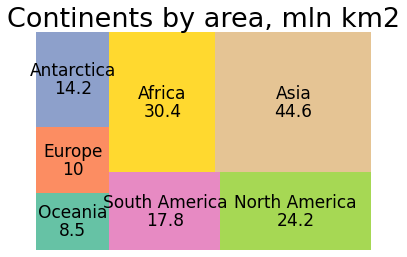

In [66]:
dct = {'Oceania': 8.5, 'Europe': 10, 'Antarctica': 14.2, 'South America': 17.8, 
       'North America': 24.2, 'Africa': 30.4, 'Asia': 44.6}
continents = list(dct.keys())
populations = list(dct.values())

squarify.plot(sizes=populations, label=continents, value=populations,
              color=[matplotlib.cm.Set2(i) for i in range(7)],
              text_kwargs={'fontsize': 17})
plt.title('Continents by area, mln km2', fontsize=27)
plt.axis('off')
plt.show()

<Figure size 720x288 with 0 Axes>

<BarContainer object of 7 artists>

Text(0.5, 1.0, 'Continents by area')

Text(0.5, 0, 'Area, mln km2')

(array([ 0., 10., 20., 30., 40., 50.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

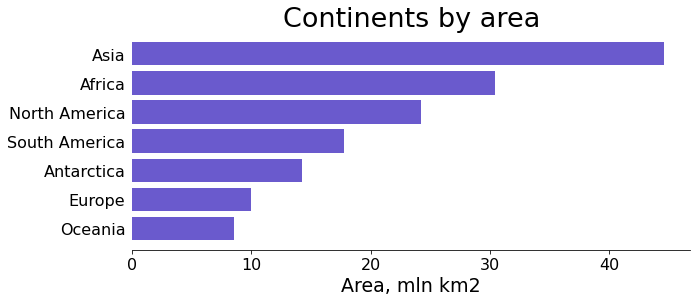

In [67]:
#Bar plot

plt.figure(figsize=(10,4))
plt.barh(continents, populations, color='slateblue')
plt.title('Continents by area', fontsize=27)
plt.xlabel('Area, mln km2', fontsize=19)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(left=False)
sns.despine(left=True)
plt.show()

**Stem plot**

A stem plot is very similar to a bar plot and even has an advantage over the latter since it’s characterized by a maximized data-ink ratio and looks less cluttered. To create a stem plot, we only need the matplotlib library. For a horizontal stem plot (the one with a horizontal baseline and vertical stems), we can use either vlines() in the combination with plot() or directly the stem() function. In the first case, vlines() creates the stems and plot() – the ending points. For a vertical stem plot (the one with a vertical baseline and horizontal stems), we can't use anymore the stem() function but the combination of hlines() and plot().


Let’s create a vertical stem plot for our data:

<Figure size 720x288 with 0 Axes>

Text(0.5, 1.0, 'Continents by area')

Text(0.5, 0, 'Area, mln km2')

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(0.0, 46.83)

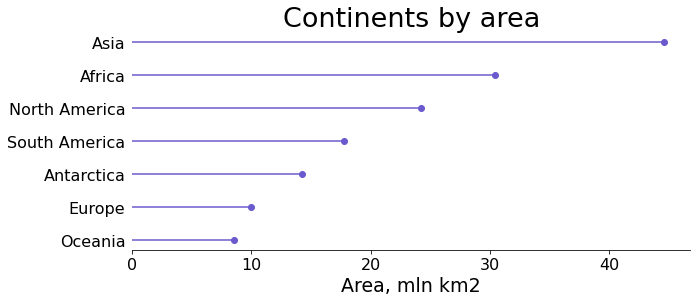

In [68]:
plt.figure(figsize=(10,4))
plt.hlines(y=continents, xmin=0, xmax=populations, color='slateblue')
plt.plot(populations, continents, 'o', color='slateblue')
plt.title('Continents by area', fontsize=27)
plt.xlabel('Area, mln km2', fontsize=19)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0, None)
plt.tick_params(left=False)
sns.despine(left=True)
plt.show()

**Pie Chart**

<Figure size 504x504 with 0 Axes>

([<matplotlib.patches.Wedge at 0x21677f97e50>,
 [Text(-0.1951794344659415, 1.0825456056728304, 'Oceania'),
  Text(-0.5904615989397864, 0.9280921830171134, 'Europe'),
  Text(-0.9672765224962129, 0.5238092487037943, 'Antarctica'),
  Text(-1.0831546455051806, -0.19177073270065673, 'South America'),
  Text(-0.5409793264569602, -0.9577793944046686, 'North America'),
  Text(0.6495482477960466, -0.8877426844447021, 'Africa'),
  Text(0.8856935641719513, 0.6523395667782124, 'Asia')],
 [Text(-0.10646150970869535, 0.5904794212760893, '6%'),
  Text(-0.3220699630580653, 0.5062320998275163, '7%'),
  Text(-0.5276053759070252, 0.285714135656615, '9%'),
  Text(-0.5908116248210076, -0.10460221783672184, '12%'),
  Text(-0.2950796326128874, -0.5224251242207283, '16%'),
  Text(0.354299044252389, -0.4842232824243829, '20%'),
  Text(0.48310558045742796, 0.35582158187902485, '30%')])

Text(-1.15, 1.5, 'Continents by area, in %')

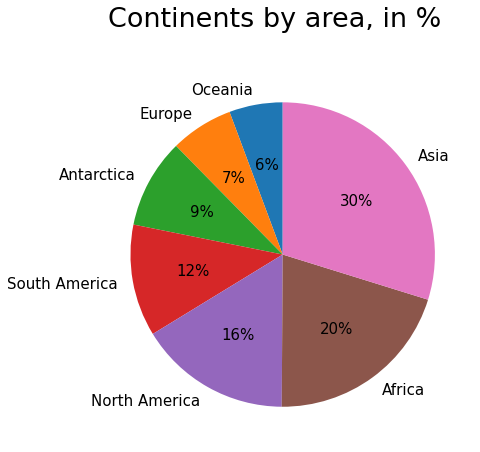

In [69]:
plt.figure(figsize=(7,7))
plt.pie(populations, labels=continents, startangle=90, autopct='%1.0f%%', 
        textprops={'fontsize': 15})
plt.text(x=-1.15, y=1.5, s='Continents by area, in %', fontsize=27)
plt.show()

# Waffle Chart

This type of plots is similar to both pie charts and treemaps since it also illustrates proportions of individual components of the whole, with the advantage that it additionally shows the number of units of each component. Depending on the context, by "unit" we can mean 1, 10, 100, etc. elements of each category (indeed, for our next visualization we'll use a unit of 1 mln km2). Each subset (category) is represented by an area on a waffle chart filled with squares. As it was with a treemap, the area of each category on the grid is proportional to its value.


Waffle charts work best when we have a relatively small set of discrete data and are interested in the internal structure of its components. It’s important to keep in mind the limitations of this type of graphs, though. The weak point related purely to a waffle chart is that the number of units in each category should be reasonably small. 

Some other limitations are in common with the already mentioned types of visualizations:


**With both pie charts and treemaps:**

- It doesn’t work well when the proportions of the categories are similar.
- It doesn’t have axes, so we have to rely on a visual comparison of the areas or add the corresponding annotations on each of them.
- It has the same issue with an inevitable abundance of colors.
- The components of a waffle chart are supposed to constitute the whole.
- It’s highly advisable to sort the data to be used as an input.

**With a pie chart:**

- When there are many categories to be compared, a waffle chart becomes inefficient.

**With a treemap:**

- The ways of customization of a waffle chart are not always straightforward and intuitively understandable.

Let’s see if using a waffle chart is a good idea for our data:

Text(0.5, 1.0, 'Continents by area')

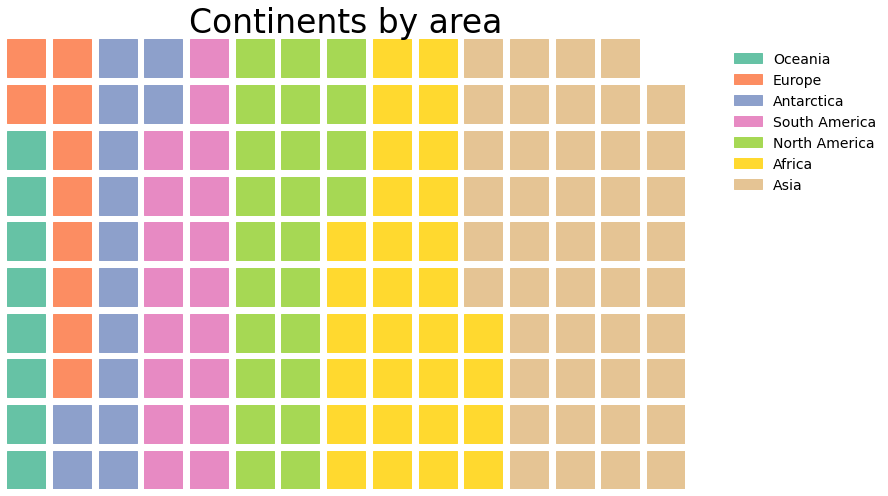

In [70]:
from pywaffle import Waffle
fig = plt.figure(FigureClass=Waffle, figsize=(12,7), values=dct, columns=15, 
                 block_arranging_style='snake',
                 legend={'bbox_to_anchor': (1.3, 1), 'fontsize':14, 'frameon': False})
plt.title('Continents by area', fontsize=33)
plt.show()

### 100% stacked bar chart

### A 100% stacked bar chart can be leveraged when we want to show the relative differences within each group for the different sub-groups available


<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

([<matplotlib.axis.XTick at 0x21678352760>,
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E')])

Text(0.5, 0, 'group')

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

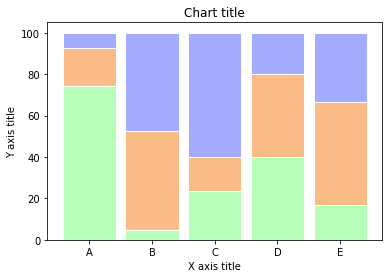

In [71]:
#100% stacked bar chart
#A 100% stacked bar chart can be leveraged when we want to show the relative differences within each group for the different sub-groups available

#Reading the dataset
r = [0,1,2,3,4]
raw_data = {'greenBars': [20, 1.5, 7, 10, 5], 'orangeBars': [5, 15, 5, 10, 15],'blueBars': [2, 15, 18, 5, 10]}
df = pd.DataFrame(raw_data)

# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]

# plot
barWidth = 0.85
names = ('A','B','C','D','E')

# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)

# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)

# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title')  
plt.show()


### Marginal plots

### Marginal plots are used to assess the relationship between two variables and examine their distributions. Such plots scatter plots that have histograms, box plots, or dot plots in the margins of respective x and y axes


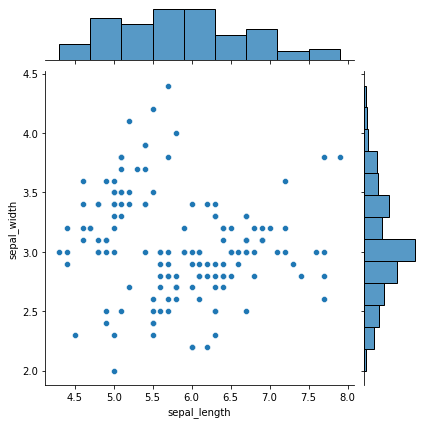

In [72]:
#Reading the dataset
iris_dataframe = sns.load_dataset('iris')

#Creating marginal graphs
sns.jointplot(x=iris_dataframe["sepal_length"], y=iris_dataframe["sepal_width"], kind='scatter')

# Show the plot
plt.show()

### Subplots

### Subplots are powerful visualizations that help easy comparisons between plots


Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

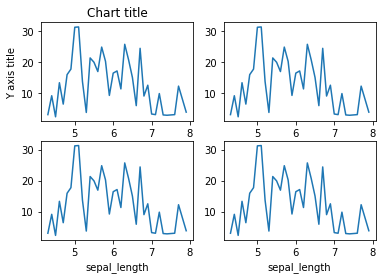

In [73]:
#Creating the dataset
df = sns.load_dataset("iris") 
df=df.groupby('sepal_length')['sepal_width'].sum().to_frame().reset_index()

#Creating the subplot
fig, axes = plt.subplots(nrows=2, ncols=2)
ax=df.plot('sepal_length', 'sepal_width',ax=axes[0,0])
ax.get_legend().remove()

#Adding the aesthetics
ax.set_title('Chart title')
ax.set_xlabel('X axis title')
ax.set_ylabel('Y axis title')
ax=df.plot('sepal_length', 'sepal_width',ax=axes[0,1])
ax.get_legend().remove()
ax=df.plot('sepal_length', 'sepal_width',ax=axes[1,0])
ax.get_legend().remove()
ax=df.plot('sepal_length', 'sepal_width',ax=axes[1,1])
ax.get_legend().remove()

#Show the plot
plt.show()
